# 🧹 Data Preparation & Feature Engineering

This notebook is the **second stage** in the machine learning pipeline and builds directly upon the insights from our data exploration. Our goal here is to **prepare the dataset** for effective training by cleaning, transforming, and engineering features that enhance the learning signal.

---

### 📌 Notebook Objective

In this notebook, we aim to:
- Clean and normalize the raw dataset
- Convert categorical features to numerical format
- Handle missing values and ambiguous data entries
- Engineer useful features from existing columns
- Set up a reproducible ML preprocessing pipeline

This ensures the dataset is model-ready and consistent across experiments.

---

### 🔍 Why This Matters

Data quality and representation directly affect model performance and fairness. A well-prepared dataset:
- Improves generalization
- Prevents data leakage
- Enables fair comparison between models
- Helps downstream explainability efforts

---


## 1. Load Data & Initial Copy 📥

In [1]:
# Importing the libaries needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import resample  


# Setting the plot style
sns.set(style='whitegrid')


In [2]:
import os
import sys
sys.path.append(os.path.abspath('..'))


In [34]:
# Importing the dataset into a DataFrame
df = pd.read_csv('../data/diabetic_data.csv')
# Creating a copy to not modify the original dataset
df_copy = df.copy()

# Displaying the first 10 rows of the copied DataFrame
df_copy.head(10)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [35]:
# Importing the custom functions, reloading the module to ensure the latest version is used
import importlib
import utils.functions as f

importlib.reload(f)


<module 'utils.functions' from '/Users/elias/Desktop/Allmänt/SDSBO (Master)/Own Projects/ML Pipeline/utils/functions.py'>

## 2. Handle Ambiguous & Missing Values ❓

#### Cleaning placeholder values and setting them as NaN values

In [36]:
# Determening placeholder values in based on commonly used values
placeholder_values = [
    'na', 'Na', 'NA',
    'NaN', 'nan', 'NAN',
    'n/a', 'N/A', 'N\A',
    'n.a.', 'N.A.', 'n.a', 'N.A',
    '?', '-', '--', '.', '*'
]

# Converting placeholder values to NaN
df_copy = df_copy.replace(placeholder_values, np.nan)

df_copy.isnull().sum().sort_values(ascending=False)

weight                      98569
max_glu_serum               96420
A1Cresult                   84748
medical_specialty           49949
payer_code                  40256
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
encounter_id                    0
troglitazone                    0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
citoglipton                     0
tolazamide                      0
examide                         0
glipizide                       0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
glyburide                       0
repaglinide   

#### Checking The DataSet For Information

In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

#### Dropping Features That Adds No Value
Based on `01_Data_exploration` there were several features in the bianry and low cardinality data subsets that are redundant, have to low variance or simply do not give any values. In addition, features with a singular class or those that are missing to many values will also be dropped. But before that we need to check if there exists entier rows across the dataset that are duplicates with the help of `encounter_id`.

In [38]:
# Checking for duplicate rows in the DatsFrame and removing them if found
if df_copy['encounter_id'].nunique() != df_copy.shape[0]:
    print("Warning: 'encounter_id' is not unique. This may cause issues in the analysis.")
    print('---'*10)
    print(f"Number of unique 'encounter_id': {df_copy['encounter_id'].nunique()}")
    print('Will drop duplicate row across entire dataset')
    # Drop duplicate rows based on 'encounter_id'
    df_copy.drop_duplicates(subset=['encounter_id'], keep='first', inplace=True)
    print('---'*10)
    print(f"Number of unique 'encounter_id' after dropping duplicates: {df_copy['encounter_id'].nunique()}")

else:
    print("All 'encounter_id' values are unique. No issues detected")

All 'encounter_id' values are unique. No issues detected


In [39]:
# Dropping the columns found in the EDA to be unnecessary or of no value
categories_to_drop = [
    'weight', 'payer_code', 'medical_specialty',
    'max_glu_serum', 'A1Cresult', 'encounter_id',           # Dropped due to high number of null values
    'examide', 'citoglipton',                               # Dropped due to low number of unique values/classes
    'acetohexamide', 'tolbutamide', 'troglitazone',         # --------- Binary values-----------
    'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone',    # --- Dropped due to low variance/redudancy---
    'repaglinide', 'nateglinide', 'chlorpropamide',         # --------- Low Cardinality values-----------
    'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'tolazamide', 'glyburide-metformin',
    'glimepiride'                                           # -- Dropped due to low variance and redundancy --
]

# Establishing the columns to be used for feature engineering, will not be dropped only for show at this time
features_to_engineer = [
    'patient_nbr',                                              # for num_of_visits, prior_visit_flag
    'diag_1', 'diag_2', 'diag_3',                               # for mapped diagnosis groups
    'age',                                                      # for ordinal or midpoint conversion
    'insulin', 'metformin', 'glipizide', 'glyburide',           # for med activity and change flags
    'admission_type_id',                                        # for emergency flag
    'discharge_disposition_id',                                 # for AMA, death flags
    'admission_source_id',                                      # for ER/referral flag
    'num_lab_procedures', 'num_procedures', 'number_diagnoses', # for complexity signals
    'admission_type_id'                                         
]


# Dropping the columns from the DataFrame
df_copy = df_copy.drop(columns=categories_to_drop)

# Diplaying the DataFrame after dropping the columns and its new shape 
print(df_copy.shape)
df_copy.head(10)

(101766, 25)


,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,diag_2,diag_3,number_diagnoses,metformin,glipizide,glyburide,insulin,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,NaN,NaN,1,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,250.01,255,9,No,No,No,Up,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,250,V27,6,No,Steady,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,250.43,403,7,No,No,No,Up,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,157,250,5,No,Steady,No,Steady,Ch,Yes,NO
5,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,...,411,250,9,No,No,No,Steady,No,Yes,>30
6,84259809,Caucasian,Male,[60-70),3,1,2,4,70,1,...,411,V45,7,Steady,No,No,Steady,Ch,Yes,NO
7,114882984,Caucasian,Male,[70-80),1,1,7,5,73,0,...,492,250,8,No,No,Steady,No,No,Yes,>30
8,48330783,Caucasian,Female,[80-90),2,1,4,13,68,2,...,427,38,8,No,Steady,No,Steady,Ch,Yes,NO
9,63555939,Caucasian,Female,[90-100),3,3,4,12,33,3,...,198,486,8,No,No,No,Steady,Ch,Yes,NO


#### Handling Logical Inconsistencies and Domain Anomalies

Certain values in the dataset may be logically inconsistent, medically unlikely, or outright impossible. These anomalies can introduce noise and negatively impact model performance. Identifying and addressing them is a quick and easy way to ensure more value to the data, especially in healthcare data where domain context matters. While this step often requires domain expertise — which not all data scientists may have — we will focus on a few key features where basic logic can still highlight potential issues worth filtering or flagging.


In [40]:
from utils.functions import placeholder_check_and_drop

# Creating a list of the columns that, in the IDS_mapping.csv file, are concidered codes for missing values. 
admission_type_id_missing = [5, 6, 8]
discharge_disposition_id_missing = [18, 25, 26]
admission_source_id_missing = [15, 17, 20, 21]
threshold = 0.10

# Clean each column if the proportion of placeholder codes is below the threshold.
df_copy = placeholder_check_and_drop(df_copy, 'admission_type_id', admission_type_id_missing,threshold)
df_copy = placeholder_check_and_drop(df_copy, 'discharge_disposition_id', discharge_disposition_id_missing,threshold)
df_copy = placeholder_check_and_drop(df_copy, 'admission_source_id', admission_source_id_missing,threshold)



Keeping all rows in 'admission_type_id' — 10.22% have placeholder codes (over 10.0%).
Dropping 4680 rows from 'discharge_disposition_id' with placeholder codes (4.60%).
Dropping 6539 rows from 'admission_source_id' with placeholder codes (6.74%).


In [41]:
# Checking distribution of values in the 'admission_type_id' column
df_copy['admission_type_id'].value_counts(normalize=True, dropna=False).sort_index(ascending=True)


admission_type_id
1.0    0.565275
2.0    0.194197
3.0    0.196981
4.0    0.000110
7.0    0.000232
NaN    0.043204
Name: proportion, dtype: float64

In [42]:
#   Replacing the NaN values direclty with specific values, this part not fit for imputation.

# Hospital records, in this case, should not have a time_in_hospital of 0. (Illogical value)
df_copy['time_in_hospital'] = df_copy['time_in_hospital'].replace(0, 1)

# Checking if we should drop columns from the DataFrame based om illogical number of diagnoses and handling it 
df_copy = placeholder_check_and_drop(df_copy, 'number_diagnoses', [0], threshold=0.10)

# Imputating the shown features that were found to have illogical values.
df_copy['admission_type_id'] = df_copy['admission_type_id'].replace(np.nan, 0)

# Displaying the new distribution of values in the 'admission_type_id' column
df_copy['admission_type_id'].value_counts(normalize=True, dropna=False).sort_index(ascending=True)

No rows in 'number_diagnoses' contain placeholder codes.


admission_type_id
0.0    0.043204
1.0    0.565275
2.0    0.194197
3.0    0.196981
4.0    0.000110
7.0    0.000232
Name: proportion, dtype: float64

#### About the Dropped Features

Many of features were dropped in this part, mainly due to a combination of high missingness, low variance and redundancy, or lack of useful information. In addition, some features (like IDs and diagnosis codes) were set aside for later use in feature engineering (part 6).


#### Splitting the Data Into Numerical and Cateogircal Subsets
Code "borrowed" drom `01_data_exploration.upynb` for the splitting

In [43]:
# Getting the list of categorical and numerical features and storing in an array 
categorical_features = df_copy.select_dtypes(include=['object', 'bool', 'category']).columns.tolist().copy()
numerical_features = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist().copy()

# Features that have codes (categorical feature) but could be numerical in the data. from IDS_mapping.csv and 
# https://datasets.aim-ahead.net/dataset/p/UCI_DS_296
hidden_categorical_features = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

for feature in hidden_categorical_features:
    if feature in numerical_features:
        numerical_features.remove(feature)
    if feature not in categorical_features:
        categorical_features.append(feature)

# Removing the target variable from the list of features
target = 'readmitted'

if target in categorical_features: 
    categorical_features.remove(target)
elif target in numerical_features:
    numerical_features.remove(target)

# Checking so that every feature has been acccounted for 
num_of_splitted_features = len(categorical_features) + len(numerical_features)

if num_of_splitted_features != len(df_copy.columns)-1:
    accounted = set(numerical_features + categorical_features)
    missing = set(df_copy.columns) - accounted
    print(f'! WARNING ! Unaccounted features: {missing}. No new DataFrame created')
else:
    print('All features have been accounted for! New DataFrames created')
    df_categorical = df_copy[categorical_features]
    df_numerical = df_copy[numerical_features]

# Converting the categorical features to the correct data type
for col in df_categorical.columns:
    df_categorical.loc[:, col] = df_categorical[col].astype('category')


All features have been accounted for! New DataFrames created


/var/folders/r2/rqs61_c910v1q6v3_ddh20rr0000gn/T/ipykernel_24362/801184310.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.0, 1.0, 1.0, 1.0, 2.0, ..., 1.0, 1.0, 1.0, 2.0, 1.0]
Length: 90547
Categories (6, float64): [0.0, 1.0, 2.0, 3.0, 4.0, 7.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_categorical.loc[:, col] = df_categorical[col].astype('category')


In [44]:
print('Shape of the categorical data:', df_categorical.shape)
df_categorical.head(10)

Shape of the categorical data: (90547, 15)


,race,gender,age,diag_1,diag_2,diag_3,metformin,glipizide,glyburide,insulin,change,diabetesMed,admission_type_id,discharge_disposition_id,admission_source_id
1,Caucasian,Female,[10-20),276,250.01,255,No,No,No,Up,Ch,Yes,1.0,1,7
2,AfricanAmerican,Female,[20-30),648,250,V27,No,Steady,No,No,No,Yes,1.0,1,7
3,Caucasian,Male,[30-40),8,250.43,403,No,No,No,Up,Ch,Yes,1.0,1,7
4,Caucasian,Male,[40-50),197,157,250,No,Steady,No,Steady,Ch,Yes,1.0,1,7
5,Caucasian,Male,[50-60),414,411,250,No,No,No,Steady,No,Yes,2.0,1,2
6,Caucasian,Male,[60-70),414,411,V45,Steady,No,No,Steady,Ch,Yes,3.0,1,2
7,Caucasian,Male,[70-80),428,492,250,No,No,Steady,No,No,Yes,1.0,1,7
8,Caucasian,Female,[80-90),398,427,38,No,Steady,No,Steady,Ch,Yes,2.0,1,4
9,Caucasian,Female,[90-100),434,198,486,No,No,No,Steady,Ch,Yes,3.0,3,4
10,AfricanAmerican,Female,[40-50),250.7,403,996,No,No,No,Steady,No,Yes,1.0,1,7


In [45]:
print('Shape of the numerical data',df_numerical.shape)
df_numerical.head(10)

Shape of the numerical data (90547, 9)


,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
1,55629189,3,59,0,18,0,0,0,9
2,86047875,2,11,5,13,2,0,1,6
3,82442376,2,44,1,16,0,0,0,7
4,42519267,1,51,0,8,0,0,0,5
5,82637451,3,31,6,16,0,0,0,9
6,84259809,4,70,1,21,0,0,0,7
7,114882984,5,73,0,12,0,0,0,8
8,48330783,13,68,2,28,0,0,0,8
9,63555939,12,33,3,18,0,0,0,8
10,89869032,9,47,2,17,0,0,0,9


#### Imputing the Missing Values

Missing values were handled separately for categorical and numerical features. Categorical features were imputed using either the most frequent value or a constant placeholder ('missing'), depending on the number of unique categories and the distribution of missing data. Numerical features were imputed using the median, which is robust to outliers and preserves the central tendency of the data.


#### Imputating the Categorical Data

In [46]:
# Looping through the categorical features to check if they need imputation.
# If needed, then the loop will dynamically check which imputer to use based on the number of unique values.
for col in df_categorical.columns:
    if df_categorical[col].isnull().sum() > 0:

        if df_categorical[col].nunique() <= 2:
            print(f'Binary feature {col} with {df_categorical[col].nunique()} unique values')
            print('Using the most frequent imputer\n')
            imputer = SimpleImputer(strategy='most_frequent')

        elif df_categorical[col].nunique() < 10 and df_categorical[col].nunique() > 2:
            print(f'Categorical feature {col} with {df_categorical[col].nunique()} unique values')
            print('Checking spread of values to decide on imputer')
            print('...')

            # Check the spread of values and their ratio of missing values
            value_counts = df_categorical[col].value_counts(normalize=True)
            na_ratio = df_categorical[col].isna().mean()
            
            # Creating a decision tree for which imputer to use based on the spread of values and the ratio of missing values.
            if value_counts.max() > 0.6 and na_ratio <= 0.05:
                print('Using the most frequent imputer')
                imputer = SimpleImputer(strategy='most_frequent')
            else:
                print('Using the missing value imputer')
                imputer = SimpleImputer(strategy='constant', fill_value='missing')
        else:
            print(f'Categorical feature {col} with {df_categorical[col].nunique()} unique values')
            print('Using missing value imputer')
            imputer = SimpleImputer(strategy='constant', fill_value='missing')

        # Imputing the missing values
        df_categorical.loc[:, col] = imputer.fit_transform(df_categorical[[col]]).ravel()
        print('Imputation done\n')


Categorical feature race with 5 unique values
Checking spread of values to decide on imputer
...
Using the most frequent imputer
Imputation done

Categorical feature diag_1 with 710 unique values
Using missing value imputer
Imputation done

Categorical feature diag_2 with 735 unique values
Using missing value imputer
Imputation done

Categorical feature diag_3 with 775 unique values
Using missing value imputer
Imputation done



In [47]:
# Displaying the imputed data
df_categorical.head(10)

,race,gender,age,diag_1,diag_2,diag_3,metformin,glipizide,glyburide,insulin,change,diabetesMed,admission_type_id,discharge_disposition_id,admission_source_id
1,Caucasian,Female,[10-20),276,250.01,255,No,No,No,Up,Ch,Yes,1.0,1,7
2,AfricanAmerican,Female,[20-30),648,250,V27,No,Steady,No,No,No,Yes,1.0,1,7
3,Caucasian,Male,[30-40),8,250.43,403,No,No,No,Up,Ch,Yes,1.0,1,7
4,Caucasian,Male,[40-50),197,157,250,No,Steady,No,Steady,Ch,Yes,1.0,1,7
5,Caucasian,Male,[50-60),414,411,250,No,No,No,Steady,No,Yes,2.0,1,2
6,Caucasian,Male,[60-70),414,411,V45,Steady,No,No,Steady,Ch,Yes,3.0,1,2
7,Caucasian,Male,[70-80),428,492,250,No,No,Steady,No,No,Yes,1.0,1,7
8,Caucasian,Female,[80-90),398,427,38,No,Steady,No,Steady,Ch,Yes,2.0,1,4
9,Caucasian,Female,[90-100),434,198,486,No,No,No,Steady,Ch,Yes,3.0,3,4
10,AfricanAmerican,Female,[40-50),250.7,403,996,No,No,No,Steady,No,Yes,1.0,1,7


#### Imputating the Numerical Data

In [48]:
# Check if imputation is done, in order to check if we should show the DataFrame or not.
counter = 0

for col in df_numerical.columns:
    if df_numerical[col].isnull().sum() > 0:
        print(f'Imputation needed for {col} with {df_categorical[col].nunique()} unique values')
        print('Using the median imputer')
        
        # Using the median imputer for the numerical features
        imputer = SimpleImputer(strategy='median')
        
        # Imputing the missing values
        df_numerical.loc[:, col] = imputer.fit_transform(df_numerical[[col]]).ravel()
        print('Imputation done\n')

        counter += 1
    else:
        print(f'No imputation needed for {col}.')

# Checking if it is worth showing the DataFrame or not. 
if counter != 0:
    df_numerical.head(10)

No imputation needed for patient_nbr.
No imputation needed for time_in_hospital.
No imputation needed for num_lab_procedures.
No imputation needed for num_procedures.
No imputation needed for num_medications.
No imputation needed for number_outpatient.
No imputation needed for number_emergency.
No imputation needed for number_inpatient.
No imputation needed for number_diagnoses.


#### Final Preprocessing Checks
A final check to make sure that the performed imputation and cleaning results in a dataset that is free of missing values or reduantand, low-value features. 


#### Final Check of the categorical Data

In [49]:
# Some prints for manually checking how the imputation went
print('Exists NaN values:', df_categorical.isnull().sum().sum() > 0)
print('Shape of the cateogircal DataFrame: ', df_categorical.shape)
print('Other information about the dataFrame:\n', df_categorical.info())
print('Unique values per feature\n', df_categorical.nunique())


Exists NaN values: False
Shape of the cateogircal DataFrame:  (90547, 15)
<class 'pandas.core.frame.DataFrame'>
Index: 90547 entries, 1 to 101765
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   race                      90547 non-null  object  
 1   gender                    90547 non-null  object  
 2   age                       90547 non-null  object  
 3   diag_1                    90547 non-null  object  
 4   diag_2                    90547 non-null  object  
 5   diag_3                    90547 non-null  object  
 6   metformin                 90547 non-null  object  
 7   glipizide                 90547 non-null  object  
 8   glyburide                 90547 non-null  object  
 9   insulin                   90547 non-null  object  
 10  change                    90547 non-null  object  
 11  diabetesMed               90547 non-null  object  
 12  admission_type_id         90547 

#### Final Check of the Numerical Data

In [50]:
# Some prints for manually checking how the imputation went
print('Exists NaN values:', df_numerical.isnull().sum().sum() > 0)
print('Shape of the numerical DataFrame: ', df_numerical.shape)
print('Other information about the dataFrame:\n', df_numerical.info())
print('Unique values per feature\n', df_numerical.nunique())
df_numerical.describe()


Exists NaN values: False
Shape of the numerical DataFrame:  (90547, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 90547 entries, 1 to 101765
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   patient_nbr         90547 non-null  int64
 1   time_in_hospital    90547 non-null  int64
 2   num_lab_procedures  90547 non-null  int64
 3   num_procedures      90547 non-null  int64
 4   num_medications     90547 non-null  int64
 5   number_outpatient   90547 non-null  int64
 6   number_emergency    90547 non-null  int64
 7   number_inpatient    90547 non-null  int64
 8   number_diagnoses    90547 non-null  int64
dtypes: int64(9)
memory usage: 6.9 MB
Other information about the dataFrame:
 None
Unique values per feature
 patient_nbr           64026
time_in_hospital         14
num_lab_procedures      115
num_procedures            7
num_medications          75
number_outpatient        39
number_emergency         33
nu

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,9.054700e+04,90547.000000,90547.000000,90547.000000,90547.000000,90547.000000,90547.000000,90547.000000,90547.000000
mean,5.752609e+07,4.379008,43.818956,1.327620,15.970667,0.366605,0.200161,0.643467,7.456459
std,3.859201e+07,2.975951,19.409929,1.696281,8.084964,1.283821,0.954757,1.274364,1.930790
min,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.435046e+07,2.000000,33.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,5.455726e+07,4.000000,45.000000,1.000000,15.000000,0.000000,0.000000,0.000000,9.000000
75%,8.922692e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,1.895026e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [51]:
# Merge categorical and numerical data back into df_copy (for feature engineering next)
df_copy = pd.concat([df_categorical, df_numerical, df_copy['readmitted']], axis=1)

print('Exists NaN values:', df_copy.isnull().sum().sum() > 0)
print('Shape of the DataFrame: ', df_copy.shape)
print('Other information about the dataFrame:\n', df_copy.info())
print('Unique values per feature\n', df_copy.nunique())

Exists NaN values: False
Shape of the DataFrame:  (90547, 25)
<class 'pandas.core.frame.DataFrame'>
Index: 90547 entries, 1 to 101765
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   race                      90547 non-null  object  
 1   gender                    90547 non-null  object  
 2   age                       90547 non-null  object  
 3   diag_1                    90547 non-null  object  
 4   diag_2                    90547 non-null  object  
 5   diag_3                    90547 non-null  object  
 6   metformin                 90547 non-null  object  
 7   glipizide                 90547 non-null  object  
 8   glyburide                 90547 non-null  object  
 9   insulin                   90547 non-null  object  
 10  change                    90547 non-null  object  
 11  diabetesMed               90547 non-null  object  
 12  admission_type_id         90547 non-null  ca

### Summary – Section 2

In this section, we cleaned and prepared the data for modeling by applying different methods. Firstly, we converted potential placeholder values to `NaN` based on commonly known placeholder values. Secondly, we dropped features that had either low variance, to high unbalance or were generally redudant and without any value. Thirdly, we separated the data into categorical and numerical, and lastly they were put trhough an imputation process for those features that had missing values. Luckly, however, after dropping the features there were only one feature that needed imputation. After these steps the data is more robust, cleaned and we have no missing or placeholder values left. 


## 3. Target Variable Transformation 🎯

In [52]:
# Checking target variable for missing values 
print('Missing values in the Target Variable:', df_copy['readmitted'].isnull().sum())

# Checking the distribtion of the target variable
df_copy['readmitted'].value_counts(normalize=True)

Missing values in the Target Variable: 0


readmitted
NO     0.537654
>30    0.350459
<30    0.111887
Name: proportion, dtype: float64

In [53]:
# We are interested in 2 cases: If the patient was readmitted within 30 days or not.
# Thus, we can binarize the target variable into two classes: 'Yes' and 'No' (1 and 0).
df_copy['target'] = df_copy['readmitted'].map({'<30': 1, '>30': 0, 'NO': 0}).copy()

# Dropping the original target variable
df_copy.drop(columns=['readmitted'], inplace=True)

# Checking the distribution of the new target variable
df_copy['target'].value_counts(normalize=True)


target
0    0.888113
1    0.111887
Name: proportion, dtype: float64

### Summary – Section 3

The target variable `readmitted` was binarized into a new column `target`, where:
- `1` indicates a readmission within 30 days (`<30`)
- `0` covers all other outcomes (`>30` and `NO`)

The original column was dropped, and class balance was inspected.


## 4. Feature Engineering 🧪

### Creating a new DataFrame for features to be engineered and checking the columns

In [77]:
df_engineering = df_copy[features_to_engineer].copy()

# Checking the distribution of the features to be engineered
print('Shape of the DataFrame:', df_engineering.shape)
print('Has any missing values:', df_engineering.isnull().sum().sum() > 0)
df_engineering.head(10)

Shape of the DataFrame: (90547, 16)
Has any missing values: False


,patient_nbr,diag_1,diag_2,diag_3,age,insulin,metformin,glipizide,glyburide,admission_type_id,discharge_disposition_id,admission_source_id,num_lab_procedures,num_procedures,number_diagnoses,admission_type_id
1,55629189,276,250.01,255,[10-20),Up,No,No,No,1.0,1,7,59,0,9,1.0
2,86047875,648,250,V27,[20-30),No,No,Steady,No,1.0,1,7,11,5,6,1.0
3,82442376,8,250.43,403,[30-40),Up,No,No,No,1.0,1,7,44,1,7,1.0
4,42519267,197,157,250,[40-50),Steady,No,Steady,No,1.0,1,7,51,0,5,1.0
5,82637451,414,411,250,[50-60),Steady,No,No,No,2.0,1,2,31,6,9,2.0
6,84259809,414,411,V45,[60-70),Steady,Steady,No,No,3.0,1,2,70,1,7,3.0
7,114882984,428,492,250,[70-80),No,No,No,Steady,1.0,1,7,73,0,8,1.0
8,48330783,398,427,38,[80-90),Steady,No,Steady,No,2.0,1,4,68,2,8,2.0
9,63555939,434,198,486,[90-100),Steady,No,No,No,3.0,3,4,33,3,8,3.0
10,89869032,250.7,403,996,[40-50),Steady,No,No,No,1.0,1,7,47,2,9,1.0


### Feature Engineering: `patient_nbr`
Since the `patient_nbr` is a unique identifier for a specific patient, which is seen here: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008 , we can use it to check how many times a patient have been admitted to the hospital. It is reasonable to believe that this insight can be helpful in predricitng if said patient will be admitted once more. For this reason, we will convert this feature into one that checks how many times a patient has been admitted to the hospital.

#### Quick Check of Feature

In [78]:
# A quick check of the feature 
print('Type of data:', df_engineering['patient_nbr'].dtype)
print('Unique values:', df_engineering['patient_nbr'].nunique())

Type of data: int64
Unique values: 64026


#### Engineering Patient History Features


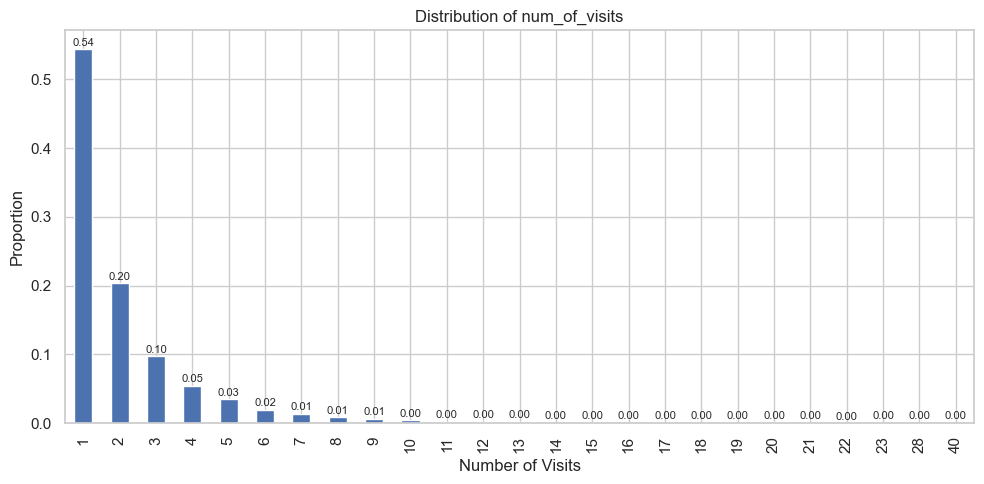

num_of_visits     1      2     3     4     5     6     7    8    9    10  ...  \
count          49273  18396  8838  4908  3130  1794  1225  760  558  380  ...   

num_of_visits  16  17  18  19   20  21  22  23  28  40  
count          48  51  72  57  120  42  22  46  28  40  

[1 rows x 25 columns]


In [79]:
# Creating a new feature: num_of_visits based on the count for each patient number
num_of_visits_per_patient = df_engineering['patient_nbr'].value_counts()

# Mapping the number of visits to each patient number to generate a new feature 
df_engineering['num_of_visits'] = df_engineering['patient_nbr'].map(num_of_visits_per_patient)

# Plotting the distribution and head of the new feature 
dist = df_engineering['num_of_visits'].value_counts(normalize=True).sort_index()
ax = dist.plot(kind='bar', figsize=(10, 5))
plt.title('Distribution of num_of_visits')
plt.xlabel('Number of Visits')
plt.ylabel('Proportion')

for i, val in enumerate(dist.values):
    ax.text(i, val + 0.005, f'{val:.2f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Displaying the numerical values of the plot 
print(df_engineering['num_of_visits'].value_counts().sort_index().to_frame().T)


#### Summary of the `num_of_visits` engineered feature
The new feature `num_of_visits` captures how many times a specific patient has been admitted to the hospital. Since the dataset focuses on diabetes-related admissions, this count reflects how frequently a patient has returned for care related to the same condition. It is reasonable to assume that multiple prior admissions increase the likelihood of future readmission. Therefore, we retain this feature as a continuous integer variable to allow the model to leverage the predictive value of higher visit counts.

From the graph and value distribution, we observe that approximately **54%** of patients were admitted only once. Furthermore, over 95% of patients fall within the range of 1 to 7 visits, indicating a long-tail, left-skewed distribution. This skewness could influence model training and may require normalization, binning, or other considerations depending on the algorithm used.

### Feature Engineering: `diag_1`, `diag_2`, and `diag_3`

These features represent primary and secondary diagnoses based on ICD-9 codes assigned to each patient. While these codes carry valuable clinical information, they are high in cardinality and difficult to interpret directly in their raw form. 
To enhance model interpretability and performance, we will map these codes to broader diagnostic categories (e.g., circulatory, respiratory, diabetes). This simplification helps retain the core medical insights while reducing noise and dimensionality.

In addition, we may create supporting features—such as binary flags indicating the presence of secondary diagnoses—to capture comorbidities that may influence readmission risk.

#### Quick Check of The Features

In [80]:
# A quick check of the feature: diag_1
print('diag_1:')
print('Type of data:', df_engineering['diag_1'].dtype)
print('Unique values:', df_engineering['diag_1'].nunique())
print('Short table of most occuring values\n', df_engineering['diag_1'].value_counts(ascending=False).sort_index().tail(10).to_frame().T)


# A quick check of the feature: diag_2
print('---'*10)
print('diag_2:')
print('Type of data:', df_engineering['diag_2'].dtype)
print('Unique values:', df_engineering['diag_2'].nunique())
print('Short table of most occuring values\n', df_engineering['diag_2'].value_counts(ascending=True).sort_index().tail(10).to_frame().T)



# A quick check of the feature: diag_3
print('---'*10)
print('diag_3:')
print('Type of data:', df_engineering['diag_3'].dtype)
print('Unique values:', df_engineering['diag_3'].nunique())
print('Short table of most occuring values\n', df_engineering['diag_3'].value_counts(ascending=True).sort_index().tail(10).to_frame().T)



diag_1:
Type of data: object
Unique values: 711
Short table of most occuring values
 diag_1  V56   V57  V58  V60  V63  V66  V67  V70  V71  missing
count    13  1040  213    1    8    1    1    1    7       18
------------------------------
diag_2:
Type of data: object
Unique values: 736
Short table of most occuring values
 diag_2  V63  V64  V65  V66  V69  V70  V72  V85  V86  missing
count    30   21   22    5    1    7   12  166    2      337
------------------------------
diag_3:
Type of data: object
Unique values: 776
Short table of most occuring values
 diag_3  V62  V63  V64  V65  V66  V70  V72  V85  V86  missing
count    28   13   42   24   13    1    8   95    3     1250


#### Engineering Patient Diagnosis - Main and Secondary

In [81]:
from utils.functions import categoric_to_numeric 

# Generating a mapping dictionary for the diagnosis codes
icd9_mapped_categories = [
    (250, 250.99, "diabetes"),                     # Keep diabetes as its own category
    (390, 459, "circulatory"),                     # Heart & vessel diseases
    (460, 519, "respiratory"),                     # Asthma, pneumonia, etc.
    (520, 579, "digestive"),                       # GI tract
    (580, 629, "genitourinary"),                   # Kidneys, bladder
    (290, 319, "mental_health"),                   # Depression, anxiety, etc.
    (800, 999, "injury_poisoning"),                # Accidents, trauma
    (140, 239, "neoplasms"),                       # Tumors, cancer
    (240, 249, "endocrine_other"),                 # Non-diabetes endocrine
    (780, 799, "symptoms_ill_defined"),            # General symptoms
    (1, 139, "infectious"),                        # Infections
]

# Converting the diagnosis codes to numeric values
for col in ['diag_1', 'diag_2', 'diag_3']:
    df_engineering = categoric_to_numeric(df_engineering, col)

# Displaying the new DataFrame with the mapped diagnosis codes
print('diag_1:')
print('Type of data:', df_engineering['diag_1'].dtype)
print('----'*10)
print('diag_2:')
print('Type of data:', df_engineering['diag_2'].dtype)
print('----'*10)
print('diag_3:')
print('Type of data:', df_engineering['diag_3'].dtype)


Converted 'diag_1' to numeric.
Converted 'diag_2' to numeric.
Converted 'diag_3' to numeric.
diag_1:
Type of data: Float64
----------------------------------------
diag_2:
Type of data: Float64
----------------------------------------
diag_3:
Type of data: Float64


In [ ]:
# Handling the NaN Values, setting them to unknown
for col in ['diag_1', 'diag_2', 'diag_3']:
    if df_engineering[col].isnull().sum() > 0:
        print(f'Imputation needed for {col} with {df_engineering[col].nunique()} unique values')
        print('----'*10)
        print('Setting the NaN values to unknown')
        df_engineering[col] = df_engineering[col].astype("object").fillna("unknown")
        print(f'Imputation done on {col}')
    else:
        print(f'No imputation needed for {col}.')

# Creating a new column that keeps the unknown diagnosis values 
df_engineering['diagnosis'] = df_engineering['diag_1']

# Mapping the diagnosis codes to the new categories 
for start, end, category in icd9_mapped_categories:
    mask = (pd.to_numeric(df_engineering['diag_1'], errors='coerce') >= start) & \
           (pd.to_numeric(df_engineering['diag_1'], errors='coerce') <= end)
    
    df_engineering.loc[mask, 'diagnosis'] = category

# Check if all categories are valid ones, and setting everything else as 'other'.
valid_categories = [category for _, _, category in icd9_mapped_categories]

df_engineering['diagnosis'] = df_engineering['diagnosis'].apply(
    lambda x: x if x in valid_categories else 'unknown'
)

# if either diag_2 or diag_3 is numerical, then the patient has a secondary diagnosis.
df_engineering['has_secondary_diagnosis'] = (
    df_engineering[['diag_2', 'diag_3']]
    .applymap(lambda x: isinstance(x, (int, float)))
    .any(axis=1)
    .astype(int)
)


Imputation needed for diag_1 with 691 unique values
----------------------------------------
Setting the NaN values to unknown
Imputation done on diag_1
Imputation needed for diag_2 with 640 unique values
----------------------------------------
Setting the NaN values to unknown
Imputation done on diag_2
Imputation needed for diag_3 with 661 unique values
----------------------------------------
Setting the NaN values to unknown
Imputation done on diag_3


/var/folders/r2/rqs61_c910v1q6v3_ddh20rr0000gn/T/ipykernel_24362/3442426266.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: isinstance(x, (int, float)))


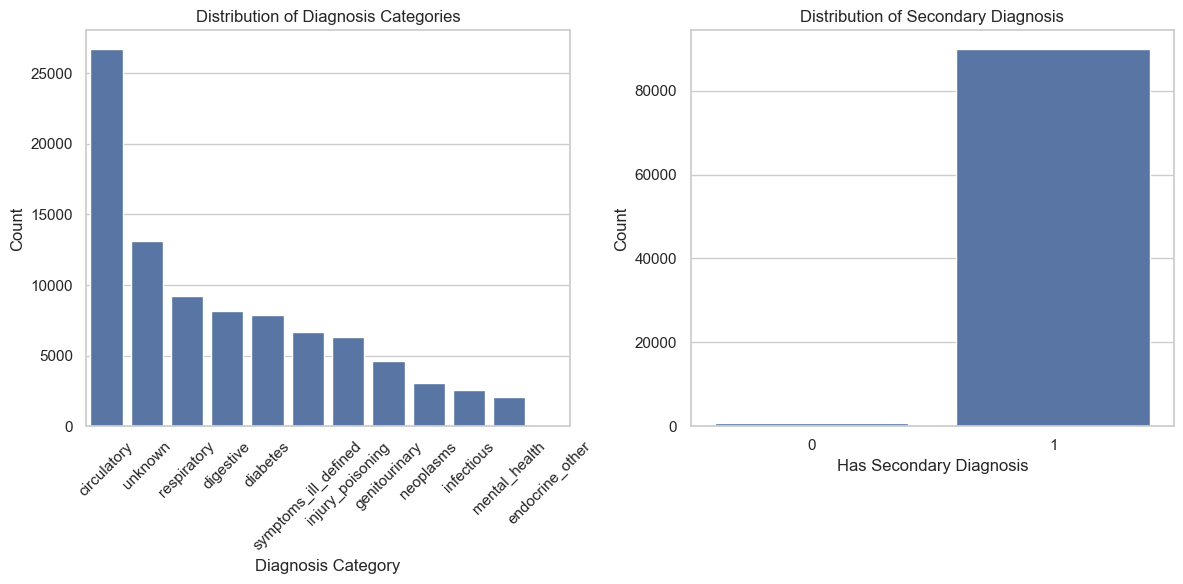

Distribution of Diagnosis Categories:
diagnosis
circulatory             0.294819
diabetes                0.087104
digestive               0.090373
endocrine_other         0.000994
genitourinary           0.051344
infectious              0.028129
injury_poisoning        0.069566
mental_health           0.022519
neoplasms               0.034104
respiratory             0.102212
symptoms_ill_defined    0.073674
unknown                 0.145162
Name: proportion, dtype: float64
------------------------------
Distribution of Secondary Diagnosis:
has_secondary_diagnosis
0    0.007422
1    0.992578
Name: proportion, dtype: float64


In [88]:
# Plotting the distribution of both the new diagnosis and the has_secondary_diagnosis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_engineering, x='diagnosis', order=df_engineering['diagnosis'].value_counts().index)
plt.title('Distribution of Diagnosis Categories')
plt.xticks(rotation=45)
plt.xlabel('Diagnosis Category')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=df_engineering, x='has_secondary_diagnosis')
plt.title('Distribution of Secondary Diagnosis')
plt.xlabel('Has Secondary Diagnosis')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Printing the distributions 
print('Distribution of Diagnosis Categories:')
print(df_engineering['diagnosis'].value_counts(normalize=True).sort_index(ascending=True).T)
print('---'*10)
print('Distribution of Secondary Diagnosis:')
print(df_engineering['has_secondary_diagnosis'].value_counts(normalize=True).sort_index(ascending=True).T)

#### Notes on The Distribution of Secondary Diagnosis (`has_secondary_diagnosis`): 
Approximately 99.3% of patients have at least one secondary diagnosis. This means the current binary feature is heavily imbalanced and provides little variance, making it unlikely to add meaningful value to any predictive model. As a result, we will drop this column and explore alternatives using `diag_2` and `diag_3`. We'll conduct some tests to assess whether these can be transformed into a more informative feature — otherwise, they may be removed entirely.

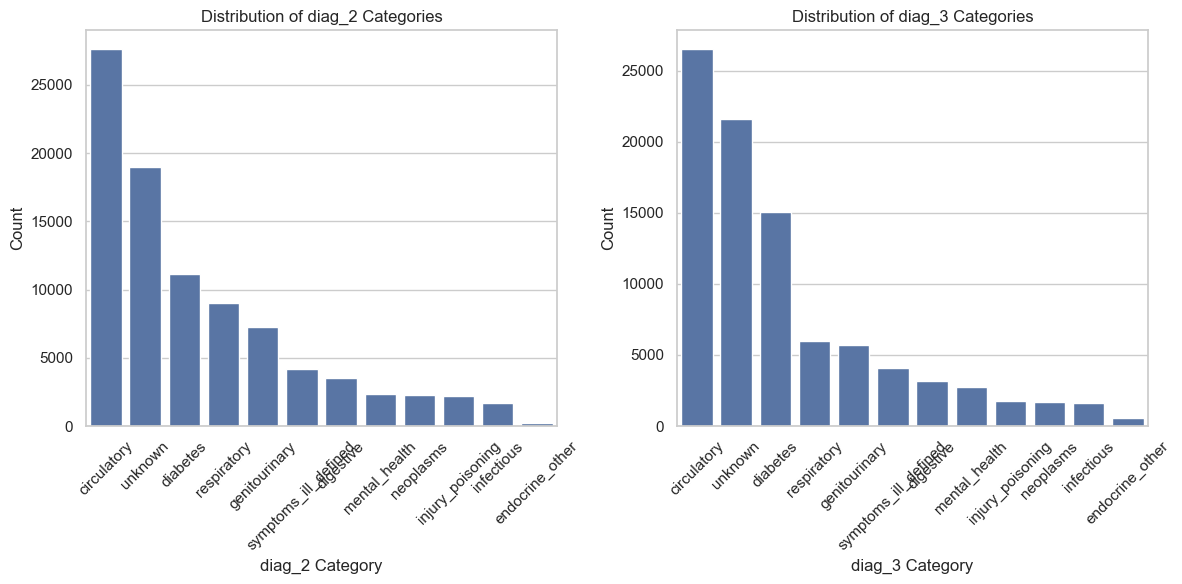

In [ ]:
# Creating new columns for categorical values for diag_2 and diag_3, as means to check their distribution
for start, end, category in icd9_mapped_categories:
    mask_2 = (pd.to_numeric(df_engineering['diag_2'], errors='coerce') >= start) & \
           (pd.to_numeric(df_engineering['diag_2'], errors='coerce') <= end)
    
    mask_3 = (pd.to_numeric(df_engineering['diag_3'], errors='coerce') >= start) & \
        (pd.to_numeric(df_engineering['diag_3'], errors='coerce') <= end)
    
    df_engineering.loc[mask_2, 'diag_2_cat'] = category
    df_engineering.loc[mask_3, 'diag_3_cat'] = category

# Remvoing NaN and setting it as unknown
df_engineering['diag_2_cat'] = df_engineering['diag_2_cat'].fillna('unknown')
df_engineering['diag_3_cat'] = df_engineering['diag_3_cat'].fillna('unknown')

# Plotting their distribution  
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df_engineering, x='diag_2_cat', order=df_engineering['diag_2_cat'].value_counts().index)
plt.title('Distribution of diag_2 Categories')
plt.xticks(rotation=45)
plt.xlabel('diag_2 Category')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=df_engineering, x='diag_3_cat', order=df_engineering['diag_3_cat'].value_counts().index)
plt.title('Distribution of diag_3 Categories')
plt.xticks(rotation=45)
plt.xlabel('diag_3 Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


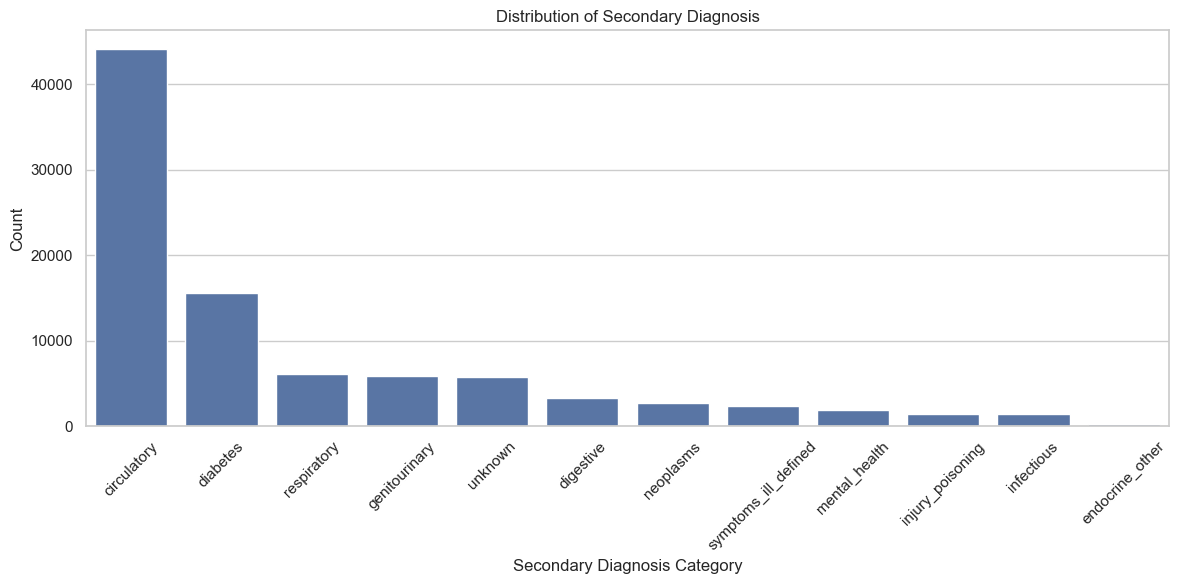

Distribution of Secondary Diagnosis:
secondary_diagnosis
circulatory             0.486698
diabetes                0.171690
digestive               0.036865
endocrine_other         0.002308
genitourinary           0.064629
infectious              0.015274
injury_poisoning        0.015738
mental_health           0.020520
neoplasms               0.030625
respiratory             0.066827
symptoms_ill_defined    0.025589
unknown                 0.063238
Name: proportion, dtype: float64


In [94]:
severity_ranking = {
    'circulatory': 5,
    'diabetes': 4,
    'neoplasms': 4,
    'respiratory': 3,
    'genitourinary': 3,
    'digestive': 3,
    'mental_health': 2,
    'injury_poisoning': 2,
    'infectious': 2,
    'endocrine_other': 2,
    'symptoms_ill_defined': 1,
    'other': 1,
    'unknown': 0
}

# Mapping diag_2 and diag_3 categories to severity scores
df_engineering['severity_diag_2'] = df_engineering['diag_2_cat'].map(severity_ranking)
df_engineering['severity_diag_3'] = df_engineering['diag_3_cat'].map(severity_ranking)

# For each row, pick the diagnosis with higher severity
df_engineering['secondary_diagnosis'] = df_engineering.apply(
    lambda row: row['diag_2_cat'] 
    if row['severity_diag_2'] >= row['severity_diag_3'] 
    else row['diag_3_cat'], axis=1
)

df_engineering.drop(columns=['severity_diag_2', 'severity_diag_3'], inplace=True)

# Plotting the resulting distribution of the secondary diagnosis
plt.figure(figsize=(12, 6))
sns.countplot(data=df_engineering, x='secondary_diagnosis', order=df_engineering['secondary_diagnosis'].value_counts().index)
plt.title('Distribution of Secondary Diagnosis')
plt.xticks(rotation=45)
plt.xlabel('Secondary Diagnosis Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print('Distribution of Secondary Diagnosis:')
print(df_engineering['secondary_diagnosis'].value_counts(normalize=True).sort_index(ascending=True).T)

### Diagnosis Feature Engineering Summary
We simplified the diag_1, diag_2, and diag_3 features by converting the ICD-9 codes into broader diagnosis categories. diag_1 was mapped to a new diagnosis feature, while diag_2 and diag_3 were merged into secondary_diagnosis based on severity. Missing or unknown codes were labeled as 'unknown' to keep the data clean.

This reduced complexity from hundreds of unique codes to a small, meaningful set of categories—making the data easier to interpret and more useful for modeling.

### Feature Engineering: `age`
Since we already have majority categorical data, we will try to handle this as numerical. Instead of giving a range we will take the medium value for each interval. This is done in order to provide the model with an easier way to handle age; it already has a clear ordinal meaning, thus a model can extract more valueable information from a continous value rather than an arbitrary string.


#### Quick Check of the Feature

In [96]:
# A quick check of the feature
print('diag_1:')
print('Type of data:', df_engineering['age'].dtype)
print('Unique values:', df_engineering['age'].nunique())
print('Short table of most occuring values\n', df_engineering['age'].value_counts(ascending=False).sort_index().tail(10).to_frame().T)


diag_1:
Type of data: object
Unique values: 10
Short table of most occuring values
 age    [0-10)  [10-20)  [20-30)  [30-40)  [40-50)  [50-60)  [60-70)  [70-80)  \
count     147      643     1523     3393     8583    15435    20090    22849   

age    [80-90)  [90-100)  
count    15379      2505  


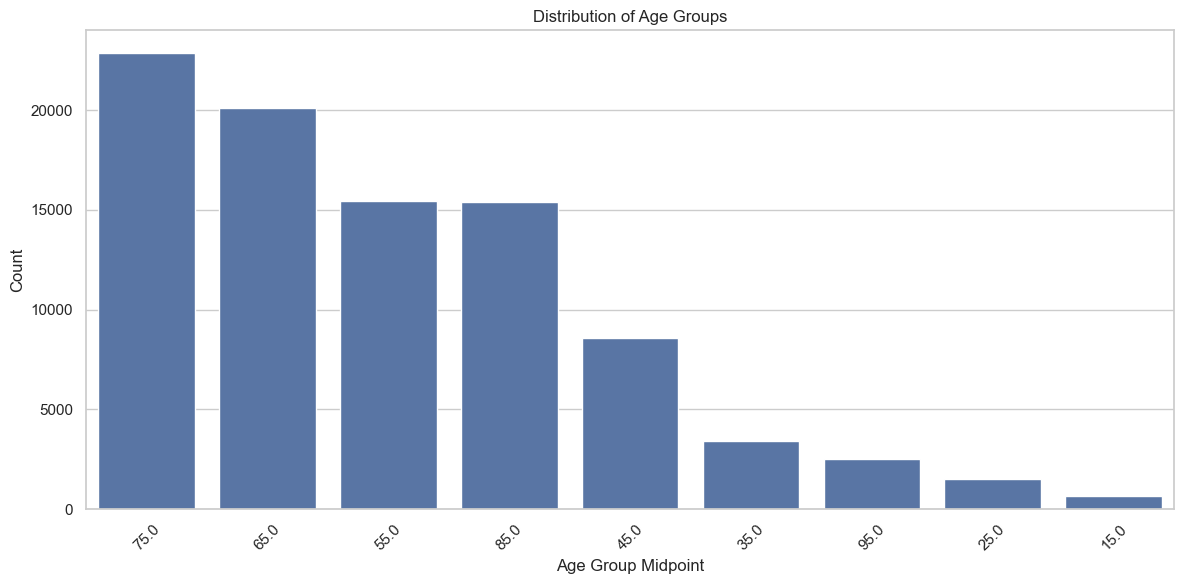

Distribution of Age Groups:
age
15.0    0.007113
25.0    0.016847
35.0    0.037533
45.0    0.094945
55.0    0.170741
65.0    0.222235
75.0    0.252754
85.0    0.170122
95.0    0.027710
Name: proportion, dtype: float64


In [98]:
# Mapping the age groups to their midpoints
df_engineering['age'] = df_engineering['age'].map({
    '0-10)': 5, '[10-20)': 15, '[20-30)': 25,
    '[30-40)': 35, '[40-50)': 45, '[50-60)': 55,
    '[60-70)':65, '[70-80)': 75, '[80-90)': 85,
    '[90-100)': 95, 'unknown': 0
    })

# Plotting the age groups and showing their distributions
plt.figure(figsize=(12, 6))
sns.countplot(data=df_engineering, x='age', order=df_engineering['age'].value_counts().index)
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45)
plt.xlabel('Age Group Midpoint')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


print('Distribution of Age Groups:')
print(df_engineering['age'].value_counts(normalize=True).sort_index(ascending=True).T)


## 5. Encode Categorical Variables 🔧

## 6. Scale Numerical Variables ⚖️

## 7. Build ML Pipeline 🧱

## 8. Export Cleaned Data 🧼